# Updating data frames

## Updating values in a dataframe

let's start by importing packages and data

In [21]:
import numpy as np
import pandas as pd
import random # used for randomly sampling integers 

# set seed for reproducibility
random.seed(42)

# import data
URL = 'https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv'
penguins = pd.read_csv(URL)

In [2]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


## ... using dictionary-like syntax

the simplest syntax to add a new col to a `pandas.DataFrame` is 

```
df['new_col_name'] = new_column_values
```

where the `new_column_values` could be:
- a `pandas.Series` or a `numpy.array` of the same length as the data frame or
- a single scalar

if the col name exists, the existing col will be updated

Remember, a `pandas.DataFrame` can be seen as a dictionary of its columns. This syntax for adding a new column to a `pandas.DataFrame` is the same as adding a new key-value pair to a dictionary

```
dict[new_key] = new_value
```

## Example

We want to create a new column where the body mass is in kilograms instead of grams, then we need to divide each value in the `body_mass_g` by 1000

In [3]:
# add column body mass in kg
penguins['body_mass_kg'] = penguins['body_mass_g']/1000

# confirm new col is in df 
print('body_mass_kg' in penguins.columns) # this is an assert test

True


In [4]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,body_mass_kg
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,3.750
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,3.800
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,3.250
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,3.450
...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009,4.000
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009,3.400
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009,3.775
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009,4.100


## ... using the `assign()` method

We can also create or update an existing column using the `assign()` method for `pandas.DataFrames`. The general syntax is:

```
df = df.assign(new_col_name = new_column_values)

```

Notice the new column names are not strings, we declare them as if we were creating variables .

This way of creating a new column, unlike the dictionary-like syntax, does not modify the data frame in-place. This can be useful for chaining operations:

<AxesSubplot:xlabel='bill_length_cm', ylabel='body_mass_g'>

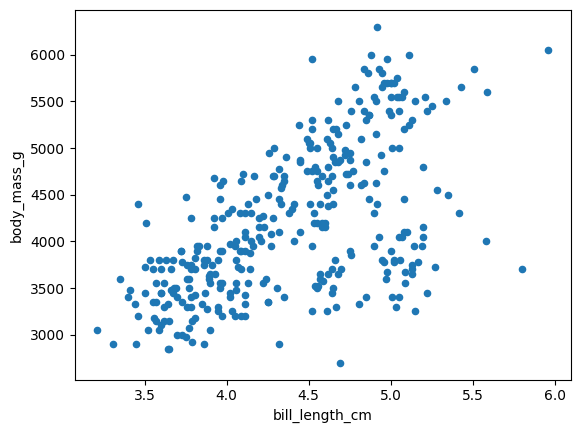

In [5]:
(penguins.assign(bill_length_cm=penguins.bill_length_mm/10)
        .plot(kind='scatter',
              x='bill_length_cm', 
              y='body_mass_g')
    )

## ... at a specific location

The new column was added by default at the end of the data frame. If we want to create a new column and insert it at a particular position we can use the data frame method `insert()`

```
df.insert(loc = integer_index, # location of new column
          column = 'new_col_name',
          value = new_col_values)
```

## Example 

Let's give each penguin observation a unique identifier as a three digit number and add this column at the beginning of the data frame

In [6]:
# create random 3-digit codes
codes = random.sample(range(100,1000), len(penguins)) # sampling without replacement

In [7]:
len(penguins)

344

In [8]:
?len

Signature: len(obj, /)
Docstring: Return the number of items in a container.
Type:      builtin_function_or_method


In [22]:
# insert codes at the front of the data frame

penguins.insert(loc=0, # index
               column= 'id_code',
               value= codes)

penguins.head()

,id_code,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,754,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,214,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,125,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,859,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,381,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


## A single value

Access a single value in a `pandas.DataFrame` using locators

- `at[]` to select by labels or 
- `iat[]` to select by index location

syntax
```
df.at[single_index_value, 'column_name']
```
* `at[]` equivalent of `loc[]` when accessing single value 

### Example

In [10]:
penguins.set_index('id_code')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,body_mass_kg
id_code,,,,,,,,,
754,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,3.750
214,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,3.800
125,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,3.250
859,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,NaN
381,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,3.450
...,...,...,...,...,...,...,...,...,...
140,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009,4.000
183,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009,3.400
969,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009,3.775


what was the bill length of the penguin with ID 677?

In [11]:
# check bill length of penguin with ID 127
penguins.at[127, 'bill_length_mm']

41.5

In [12]:
# correct bill length of penguin with ID 127
penguins.at[127, 'bill_length_mm'] = 38.3 # [index, col]

# confirm value was updated
penguins.loc[127]

id_code                    505
species                 Adelie
island               Torgersen
bill_length_mm            38.3
bill_depth_mm             18.3
flipper_length_mm        195.0
body_mass_g             4300.0
sex                       male
year                      2009
body_mass_kg               4.3
Name: 127, dtype: object

if we want to access or update a single value by index position, we use `iat[]` locator:

syntax
```
df.iat[index_integer_location, column_integer_location]
```
we can dynamically get location of a single column 

```

df.columns.get_loc['column_name']
```


### Check-in

a. Obtain the location of the `bill_length_mm` column.

b. Use `iat[]` to access the same bill length value for the penguin with ID 859 and revert it back to an NA. Confirm your update using `iloc[]`.

In [13]:
# a obtain location of bill_length_mm 

bill_length_index = penguins.columns.get_loc('bill_length_mm')

penguins.iat[3, bill_length_index]= np.nan
penguins.iloc[3]

id_code                    859
species                 Adelie
island               Torgersen
bill_length_mm             NaN
bill_depth_mm              NaN
flipper_length_mm          NaN
body_mass_g                NaN
sex                        NaN
year                      2007
body_mass_kg               NaN
Name: 3, dtype: object

## Multiple values in a column 

### Using a condition

Examples:

We want to classify the Palmer penguins such that:

- penguins with body mass < 3kg are small 
- penguins with 3kg <= body mass < 5kg are medium
- penguins with 5kg < body mass are large


In [14]:
# create list with the conditions

conditions = [penguins.body_mass_kg < 3,
             (3 <= penguins.body_mass_kg) & (penguins.body_mass_kg <5),
              5 <= penguins.body_mass_kg
             ]

# create list with choices
choices = ['small',
          'medium',
          'lalrge']

# add the selections using np.select
penguins['size'] = np.select(conditions, 
                            choices,
                            default = np.nan)

penguins.head()

,id_code,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,body_mass_kg,size
0,754,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,3.75,medium
1,214,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,3.80,medium
2,125,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,3.25,medium
3,859,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,NaN,nan
4,381,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,3.45,medium


## Update values by selecting them

We can do this with `loc` or `iloc` and assigning new valeus 

syntax:
```
df.loc[row_selection, column_name] = new_values
```

- `row_selection` is the rows we want to update, this can be any expression that gives us a boolean `pandas.Series`,
- `col_name` is a single column name, and
- `new_values` is the new value or values we want. If using multiple values, then `new_values` must be of the same length as the number of rows selected.

using `iloc`in assignment modifies the data frame directly without the need for reassignment.

### Example

In [15]:
# Select rows with sex=male and simplify values in 'sex' column
penguins.loc[penguins.sex=='male', 'sex'] = 'M'

# Check changes in 'sex' column specifically
print(penguins['sex'].unique())

['M' 'female' nan]


### Best Practices


In [16]:
# Select rows where 'sex' is 'female' and then attempt to update 'sex' column values
penguins[penguins.sex=='female']['sex'] = 'F' # This raises SettingWithCopyWarning

/opt/python/3.7.13/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Check-in
update the 'female' values without the warning and check that the values are updated

In [17]:
# selec rows sex = female and simplify values in sex colun
penguins.loc[penguins.sex == 'female', 'sex'] = 'F'

penguins.sex.unique()

array(['M', 'F', nan], dtype=object)

To understand why the `SettingWithCopyWarning` pops up we need to understand that some pandas operations return a view to your data, while others return a copy of your data.

Views are actual subsets of the original data, when we update them, we are modifying the original data frame.

Copies are unique objects, independent of our original data frames. When we update a copy we are not modifying the original data frame.



### Example
We only want to use data from Biscoe island and, after doing some analyses, we want to add a new column to it:


In [18]:
# Select penguins from Biscoe island
biscoe = penguins[penguins.island=='Biscoe']

# ... Other analyses ...

# Add a column
biscoe['sample_col'] = 100  # This raises SettingWithCopyWarning

/opt/python/3.7.13/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [19]:
# Confirm the new column is in our subset data
biscoe.head()

,id_code,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,body_mass_kg,size,sample_col
20,338,Adelie,Biscoe,37.8,18.3,174.0,3400.0,F,2007,3.40,medium,100
21,617,Adelie,Biscoe,37.7,18.7,180.0,3600.0,M,2007,3.60,medium,100
22,716,Adelie,Biscoe,35.9,19.2,189.0,3800.0,F,2007,3.80,medium,100
23,127,Adelie,Biscoe,38.2,18.1,185.0,3950.0,M,2007,3.95,medium,100
24,674,Adelie,Biscoe,38.8,17.2,180.0,3800.0,M,2007,3.80,medium,100


In [20]:
# Confirm that original data was not modified
print('sample_column' in penguins.columns)

False


The `SettingWithCopyWarning` can be tricky, there are also false positives and false negatives. Avoiding chained indexing and making a copy of your data frame subset when needed and possible will save you from the usual pitfalls